# 5 niveaux de RAG

Un RAG (Retrieval-Augmented Generation) est un moteur de recherche enrichi par l’intelligence artificielle.

C'est un système complexe composé de trois grandes étapes :
* L’ingestion : interprétation et traitement d'une requête utilisateur.
* La récupération : extraction des données pertinentes en fonction du contexte.
* La restitution : génération d'une réponse en langage naturel à partir des données récupérées.

L’idée de ce notebook est de construire un RAG en 5 niveaux de complexité croissante, nécessitant progressivement plus de puissance de calcul, de temps et de ressources (notamment en crédits API).

Voici les 5 niveaux de RAG :
1. Niveau 1 : RAG naïf
Récupération simple des documents les plus pertinents et génération d’une réponse basique.
1. Niveau 2 : RAG avec Multi-Query
Génération de plusieurs formulations de la requête initiale pour améliorer la couverture du contexte.
1. Niveau 3 : RAG avec FAISS, index stocké et configurable
Utilisation d’un moteur de recherche vectoriel (comme FAISS) avec un index persistant et configurable.
1. Niveau 4 : RAG avec Reciprocal Rank Fusion (RRF)
Fusion des résultats de plusieurs requêtes pour améliorer la qualité du classement des documents.
1. Niveau 5 : RAG avec décomposition de requête et de réponse (Query/Response Decomposition)
Capacité à analyser des requêtes complexes, les décomposer en sous-questions, et synthétiser les réponses.


Objectif de la construction de ces 5 niveaux :
* Comprendre les principes fondamentaux du RAG.
* Explorer les possibilités d’optimisation à chaque niveau.
* Mesurer les compromis entre simplicité, performance, coût et pertinence.
* Fournir un cadre progressif pour construire un système RAG robuste et modulaire.

Chaque niveau sera détaillé avec ses fonctionnalités, ses avantages et inconvénients, ainsi que les technologies utilisées.

## Environment variales

In [ ]:
## --> Add Necessary env variables here


## Préparation de l'environnement de travail

In [ ]:
# Check for GPU
!nvidia-smi

Tue Jun 24 12:07:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   58C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# General upgrade
!apt-get update -y && apt-get upgrade -y

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,747 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,253 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packa

In [ ]:
# Install Pytorch
!pip install torch

# Instal TensorFlow (colab GPU)
!pip install tensorflow

# Install Hugging Face Transformers, Datasets, et Diffusers
!pip install transformers datasets diffusers accelerate huggingface_hub

# Install langchain, langgraph
!pip install langchain langchain_ollama langchain_community langchain-nomic langgraph langchain_openai langsmith

!pip install ipywidgets tiktoken "nomic[local]" scikit-learn

# Install other utils
!pip install chromadb diskcache

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 41.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 97.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 6.0 MB/s eta 0:0

In [ ]:
import getpass
import os

if not OPENAI_API_KEY:
 OPENAI_API_KEY = getpass.getpass("Enter API key for OpenAI: ")

from langchain.chat_models import init_chat_model

# RAG niveau 1

Cette implémentation propose une organisation modulaire d’un pipeline RAG en utilisant Langraph et une classe Pydantic State pour structurer les flux de données.

## Pourquoi cette approche ?

✅ Modularité : Chaque agent a une responsabilité spécifique (ingestion, récupération, restitution).

✅ Utilisation de Langraph : Permet de structurer le pipeline sous forme de graphe d’exécution.

✅ Centralisation de l’état : Grâce à une classe RAGState, toutes les étapes partagent leurs données de manière fluide.

✅ Extensibilité : Facile à enrichir avec de nouvelles fonctionnalités (ex: feedback loop, post-traitement, analyse sémantique avancée).

## Limites du RAG niveau 1 (naïf)
Cette implémentation correspond à un RAG de niveau 1 : fonctionnel, mais encore naïf dans sa stratégie de récupération d’information. Il présente plusieurs limites importantes :

⚠️ Un seul point de vue par requête
La récupération se base sur une seule formulation de la requête utilisateur. Cela limite fortement la couverture sémantique : si la requête est mal formulée, peu ou pas de documents pertinents seront trouvés.

⚠️ Pas de reformulation intelligente
Le pipeline ne reformule pas dynamiquement les requêtes pour explorer différentes formulations possibles ou synonymes, ce qui peut induire des résultats incomplets.

⚠️ Pas de robustesse face aux ambiguïtés
Si la question est floue ou ambigüe, le système ne pose pas de clarification, ni n'essaie d'élargir les angles d’approche.

⚠️ Pas de fusion ou agrégation avancée des réponses
Une fois les documents récupérés, la réponse générée est basée uniquement sur ce sous-ensemble sans stratégie de comparaison, vote, ou condensation multi-sources.

## 🏗️ Organisation du pipeline

Ce pipeline RAG est structuré autour de plusieurs agents interconnectés sous forme de graphe d'exécution dynamique. Chaque agent joue un rôle précis dans la chaîne de traitement.

📥 IngestionAgent

* Accepte des sources de types variés : URL web, fichiers locaux (texte, PDF), ou contenus d’API externes.
* Utilise des loaders spécialisés pour extraire les contenus textuels.
* Segmente les documents en morceaux de taille optimale via un découpage sémantique (RecursiveCharacterTextSplitter).
* Prépare les documents à être indexés dans un espace vectoriel.

🔍 RetrievalAgent

* Transforme les documents ingérés en vecteurs via un modèle d'embedding (OpenAI ou Ollama).
* Crée un index vectoriel avec Chroma pour permettre une recherche rapide.
* Récupère les documents les plus pertinents en fonction d’une requête utilisateur.
* Prépare ces documents pour le modèle de génération sous forme de contexte.

📝 RestitutionAgent

* Utilise un LLM (comme gpt-4o-mini) pour générer une réponse naturelle à partir du contexte documenté.
* Structure la réponse de manière claire, avec exemples si nécessaire.
* S’appuie sur des templates de prompt pour cadrer la génération.

💚 FeedbackAgent

* Reçoit le feedback utilisateur sur la qualité de la réponse.
* Analyse s’il faut reformuler la requête (ex : "pas clair", "ajoute des exemples").
* Relance le pipeline avec une version enrichie de la requête si besoin.
* Permet d’améliorer de manière itérative la qualité des réponses générées.





| 📌 Technologie             | 🔎 Rôle                                                                                         |
| -------------------------- | ----------------------------------------------------------------------------------------------- |
| **LangChain**              | Orchestration des composants RAG (loaders, embeddings, retrieval, LLM).                         |
| **LangGraph**              | Organisation du pipeline sous forme de graphe déclaratif (états + transitions conditionnelles). |
| **Pydantic**               | Définition du schéma d’état global (`RAGState`) avec validation automatique.                    |
| **ChromaDB**               | Stockage vectoriel local pour retrouver les documents similaires efficacement.                  |
| **OpenAI / Ollama**        | Fournissent les modèles de génération (`ChatOpenAI`, `ChatOllama`) et d’embedding.              |
| **Markdown / PDF Loaders** | Chargent les contenus à partir de sources hétérogènes (web, fichiers, APIs).                    |
| **Requests**               | Accès aux données issues d’APIs REST pour ingestion.                                            |


## Realisation

In [ ]:
import os

from typing import List, Optional
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph
from pydantic import BaseModel
import bs4
from langsmith import traceable, Client
from langchain.callbacks.tracers.langchain import LangChainTracer
from langchain.callbacks.manager import CallbackManager
from langchain_community.document_loaders import WebBaseLoader, PyPDFLoader, TextLoader
import requests
from typing import Dict, List, Optional


In [ ]:
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

def get_chat_model(config):
    model_type = "openai"
    model_name = "gpt-4o-mini"
    model_temperature = 0.3
    model_max_retries = 3

    print(f"Selected Configuration:\n"
          f"Model Type: {model_type}\n"
          f"Model Name: {model_name}\n"
          f"Temperature: {model_temperature}\n"
          f"Max Retries: {model_max_retries}")

    if model_type.lower() == "ollama":
        # Return ChatOllama if the model type is "ollama"
        return ChatOllama(
            model=model_name,
            temperature=model_temperature,
            max_retries=model_max_retries
        )
    elif model_type.lower() == "openai":
        # Return ChatOpenAI if the model type is "openai"
        return ChatOpenAI(
            model=model_name,
            temperature=model_temperature,
            max_retries=model_max_retries,
            api_key=OPENAI_API_KEY
        )
    else:
        raise ValueError(f"Unrecognized model type: {model_type}")


def get_embeddings(config):
    model_type = "openai"
    model_name = "text-embedding-3-small"

    print(f"Selected Embedding Configuration:\n"
          f"Embedding Type: {model_type}\n"
          f"Embedding Model: {model_name}")

    if model_type.lower() == "ollama":
        return OllamaEmbeddings(
            model=model_name
        )
    elif model_type.lower() == "openai":
        return OpenAIEmbeddings(
            model=model_name,
            api_key=OPENAI_API_KEY
        )
    else:
        raise ValueError(f"Unrecognized model type: {model_type}")

In [ ]:
#### 🏗️ Définition de l'état global ####
class RAGState(BaseModel):
    query: str
    sources: List[Dict[str, str]]  # List[str]
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[str]] = None
    answer: Optional[str] = None
    should_continue: bool = False
    feedback_input: Optional[str] = None

In [ ]:
#### 📥 Agent d'Ingestion ####

from langchain.document_loaders import PyPDFLoader, TextLoader
import requests

def ingestion_agent(state: RAGState) -> RAGState:
    all_docs = []

    for source in state.sources:
        src_type = source.get("type")
        path = source.get("path")

        if src_type == "web":
            loader = WebBaseLoader(web_paths=[path])
        elif src_type == "pdf":
            loader = PyPDFLoader(path)
        elif src_type == "file":
            loader = TextLoader(path)
        elif src_type == "api":
            response = requests.get(path)
            if response.status_code == 200:
                content = response.text
                all_docs.append(Document(page_content=content))
                continue
            else:
                print(f"⚠️ API inaccessible : {path}")
                continue
        else:
            print(f"⚠️ Type de source inconnu : {src_type}")
            continue

        docs = loader.load()
        all_docs.extend(docs)

    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
    splits = text_splitter.split_documents(all_docs)

    return {"available_docs": len(all_docs), "ingested": splits}

In [ ]:
#### 🔍 Agent de Récupération ####
def retrieval_agent(state: RAGState) -> RAGState:
    if not state.available_docs > 0:
        raise ValueError("Aucun document indexé !")

    target_embedding = get_embeddings({
        "configurable": {
            "embedding_type": "openai",
            "embedding_model": "text-embedding-3-small"
        }
    })

    vectorstore = Chroma.from_documents(documents=state.ingested, embedding=target_embedding)
    retriever = vectorstore.as_retriever()
    docs = retriever.invoke(state.query)

    if not docs:
        print("❌ Aucun document pertinent récupéré.")
    else:
        print(f"✅ {len(docs)} document(s) récupéré(s)")

    formatted_docs = "\n\n".join(doc.page_content for doc in docs)
    return {"retrieved_docs": [formatted_docs]}


In [ ]:
#### 📝 Agent de Restitution ####
def restitution_agent(state: RAGState) -> RAGState:
    if not state.retrieved_docs:
        raise ValueError("Aucun document récupéré !")

    target_llm = get_chat_model({
        "configurable": {
            "model_type": "openai",
            "model": "gpt-4o-mini",
            "temperature": 0,
            "max_retry": 2
        }
    })

    prompt_template = ChatPromptTemplate.from_template("""
    Répondez à la question en utilisant uniquement le contexte suivant :
    {context}

    Sois précis et donne des exemples

    Question : {question}
    """)

    chain = prompt_template | target_llm | StrOutputParser()
    response = chain.invoke({
        "context": "\n\n".join(state.retrieved_docs),
        "question": state.query
    })

    return {"answer": response}

In [ ]:
#### 💚 Agent de Feedback ####
client = Client()

def feedback_agent(state: RAGState) -> RAGState:
    feedback = state.feedback_input.lower()

    # Si feedback utile, modifier la requête
    if any(word in feedback for word in ["pas clair", "exemple", "vague", "mauvais", "recommence", "précis"]):
        print(state.query)
        new_query = f"{state.query} (Améliore avec des exemples et plus de clarté, l'utilisateur a dit: '{feedback}')"
        return {
            "query": new_query,
            "should_continue": True,
            "feedback_input": None  # reset
        }

    # Feedback pas utile ou non pertinent
    return {
        "should_continue": False,
        "feedback_input": None
    }




def ask_feedback_agent(state: RAGState) -> RAGState:
    print("💬 Réponse :", state.answer)
    user_feedback = input("📝 Entrez un feedback (ou laissez vide pour continuer) : ").strip()

    return {
        "feedback_input": user_feedback,
        "should_continue": bool(user_feedback)
    }


/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
#### 📌 Construction du graphe ####
graph = StateGraph(RAGState)

# Ajout des agents
graph.add_node("ingestion", ingestion_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)
graph.add_node("ask_feedback", ask_feedback_agent)
graph.add_node("feedback", feedback_agent)


# Connexion des étapes
graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "retrieval")
graph.add_edge("retrieval", "restitution")
graph.add_edge("restitution", "ask_feedback")
graph.add_edge("ask_feedback", "feedback")

# Conditionnelle : soit on relance, soit on termine
graph.add_conditional_edges("feedback", lambda state: "retrieval" if state.should_continue else "end")


# Exécution du pipeline
executor = graph.compile()

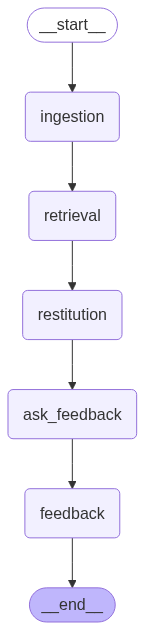

In [ ]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [ ]:
@traceable(name="Full RAG Pipeline")
def run_pipeline(query: str, sources: List[str]) -> RAGState:
    return executor.invoke(RAGState(query=query, sources=sources))

#### 🚀 Test du RAG organisé avec Langraph + LangSmith ####
query = "Comment utiliser les outils de LangGraph en python ?"
sources = [
    {"type": "web", "path": "https://langchain-ai.github.io/langgraph/tutorials/get-started/2-add-tools/#add-tools"} #,
    # {"type": "file", "path": "./langchain.md"}
]
result = run_pipeline(query, sources)
print("💬 Réponse :", result['answer'])


Selected Embedding Configuration:
Embedding Type: openai
Embedding Model: text-embedding-3-small
✅ 4 document(s) récupéré(s)
Selected Configuration:
Model Type: openai
Model Name: gpt-4o-mini
Temperature: 0.3
Max Retries: 3
💬 Réponse : Pour utiliser les outils de LangGraph en Python, vous pouvez suivre ces étapes :

1. **Installation de LangGraph** : Assurez-vous d'avoir installé la bibliothèque LangGraph. Vous pouvez le faire via pip :
   ```bash
   pip install langgraph
   ```

2. **Utilisation des composants préconstruits** : LangGraph propose des composants préconstruits qui facilitent le développement. Par exemple, vous pouvez utiliser des composants pour exécuter des API en parallèle. Voici un exemple de code :
   ```python
   from langgraph import PrebuiltComponent

   # Créez une instance d'un composant préconstruit
   component = PrebuiltComponent()

   # Utilisez le composant pour exécuter des tâches
   results = component.execute_parallel(api_calls)
   ```

3. **Création de 

# RAG niveau 2 avec MultiQuery

Cette implémentation propose une organisation modulaire avancée d’un pipeline Retrieval-Augmented Generation (RAG) en utilisant :
* LangGraph pour orchestrer le flux d’agents
* Pydantic pour structurer les données via un RAGState
* Une stratégie MultiQuery pour améliorer la qualité de récupération des documents
* Un système de cache intégré pour optimiser les performances


## Pourquoi cette approche ?
✅ Centralisation de l'état : Grâce à des classes Pydantic (RAGState, MultiQueryOutput, ResponseFormatter), toutes les étapes partagent leurs données de manière structurée.

✅ Robustesse : Utilisation de sorties structurées pour chaque étape du pipeline.

✅ Récupération améliorée : La stratégie MultiQuery explore plusieurs reformulations de la requête pour maximiser la couverture.

✅ Performance optimisée : Intégration native d’un cache (requêtes fréquentes → réponses instantanées).

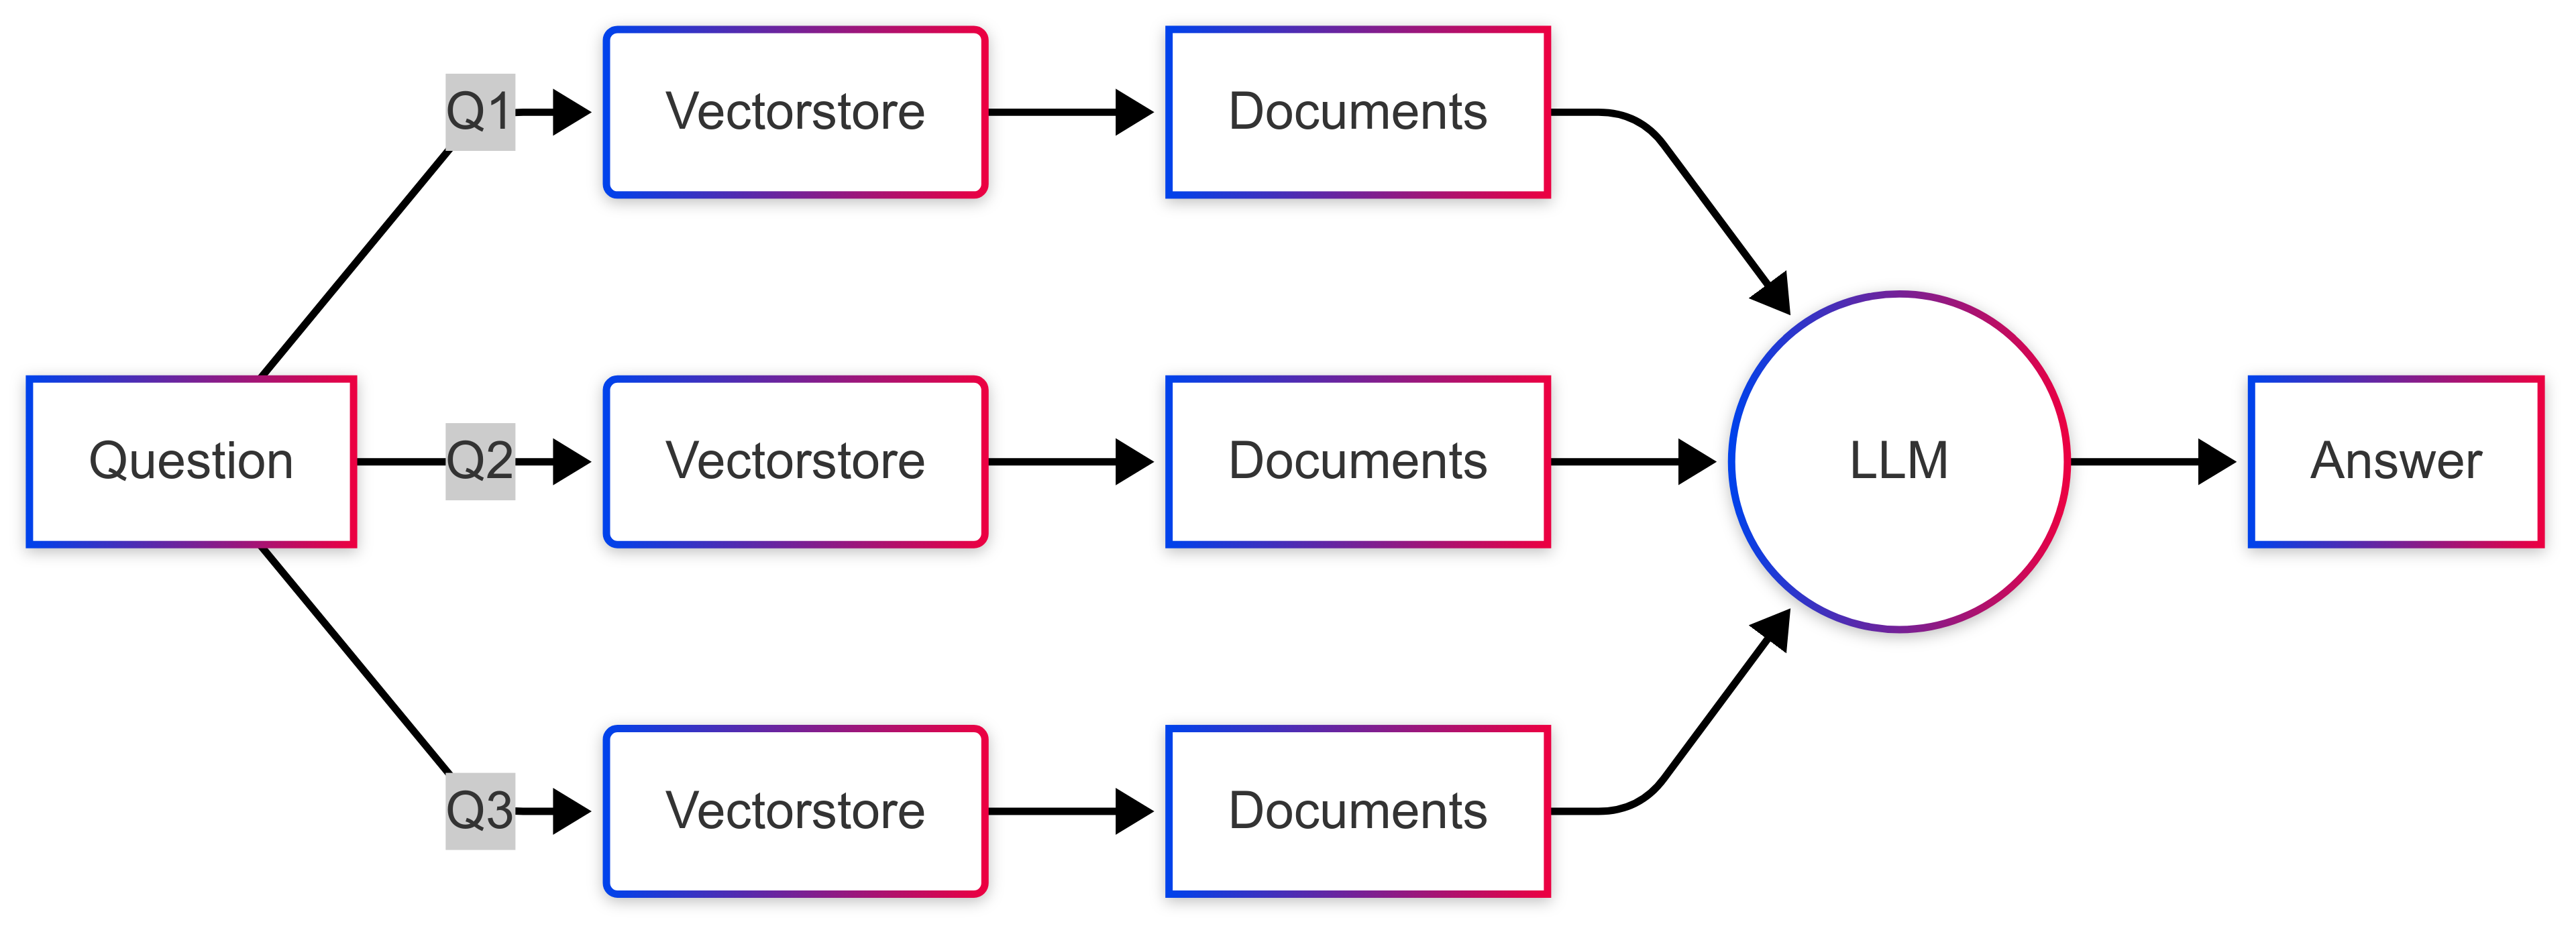

## 🏗️ Organisation du pipeline
Ce pipeline est structuré autour de plusieurs agents orchestrés dans un graphe LangGraph.

| Étape                   | Rôle                                                           |
| ----------------------- | -------------------------------------------------------------- |
| 📥 `IngestionAgent`     | Charge et prépare les documents sources                        |
| 🔁 `CheckCacheAgent`  | Vérifie si la requête est déjà en cache (multiquery + réponse) |
| 🎯 `MultiQueryAgent`    | Génère des variations de la question avec un raisonnement      |
| 🔍 `RetrievalAgent`     | Cherche dans les documents à l’aide de chaque variation        |
| 📝 `RestitutionAgent`   | Génère une réponse structurée à partir du contexte             |
| 🧠 `ReturnCachedAnswer` | Retourne directement la réponse si elle est déjà en cache      |
| 💬 `AskFeedbackAgent`   | Demande un retour utilisateur sur la réponse                   |
| 🔄 `FeedbackAgent`      | Relance le pipeline si le feedback suggère une amélioration    |


## 📌 Structure du Code
Le pipeline est construit sous la forme d'un graphe d'agents, avec un flux enrichi :

    ➜ ingestion
          ↓
    ➜ check_cache
        ├─(hit)──> return_cached_answer
        └─(miss)─> multiquery
                        ↓
                  retrieval
                        ↓
                  restitution
                        ↓
                ask_feedback
                        ↓
                    feedback


⚙️ En cas de feedback utile, le pipeline reboucle depuis retrieval.


## 🔍 Sorties Structurées
Le pipeline utilise trois classes Pydantic principales :

MultiQueryOutput
```python
class MultiQueryOutput(BaseModel):
    queries: List[str]      # Liste des variations de requêtes
    reasoning: str          # Explication du raisonnement
```

ScoredQuery
```python
class ScoredQuery(BaseModel):
    query: str
    score: float  # entre 0.0 et 1.0
```

ResponseFormatter
```python
class ResponseFormatter(BaseModel):
    answer: str            # Réponse finale
    sources: List[str]     # Sources utilisées
```

RAGState
```python
class RAGState(BaseModel):
    query: str
    sources: List[Dict[str, str]]
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[str]] = None
    multiple_queries: Optional[MultiQueryOutput] = None
    answer: Optional[ResponseFormatter] = None
    feedback_input: Optional[str] = None
    should_continue: bool = False
    cache_hit: Optional[bool] = None
```


## ⚡ Avantages du MultiQuery

| Avantage                     | Description                                                              |
| ---------------------------- | ------------------------------------------------------------------------ |
| 📚 **Couverture accrue**     | Capture différentes interprétations de la requête originale              |
| 🛡️ **Robustesse**           | Réduit la dépendance à une formulation unique                            |
| 🔎 **Transparence**          | Chaque requête est accompagnée d’un score et d’un raisonnement explicite |
| 🧪 **Validation structurée** | Les étapes reposent sur des schémas Pydantic solides                     |
| 🚀 **Performance**           | Le cache permet des réponses instantanées pour les questions fréquentes  |


## ⚠️ Inconvénients & Prochaines étapes

| Limite                       | Conséquence                        | Amélioration au niveau 3                      |
| ---------------------------- | ---------------------------------- | --------------------------------------------- |
| Cache local uniquement       | Non partagé entre instances        | Redis, base distribuée                        |
| VectorStore en mémoire       | Pas persistant, pas optimisé       | Index FAISS local & persistant                |
| Recherche naïve              | Recherche par similarité simple    | Fusion des résultats avec RRF                 |
| Pas d’aiguillage intelligent | Le flux va toujours vers ingestion | Agent d'initialisation pour routage dynamique |



## Réalisation

In [ ]:
from typing import List, Optional
from pydantic import BaseModel, Field
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document
from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph
from operator import itemgetter
from langchain.load import dumps, loads
from functools import lru_cache
from diskcache import Cache

multiquery_cache = Cache("./multiquery_cache")
response_cache = Cache("./response_cache")

In [ ]:
class ScoredQuery(BaseModel):
    query: str
    score: float = Field(
        ge=0.0, le=1.0,
        description="A relevance score between 0 (bad) and 1 (very relevant)"
    )

class MultiQueryOutput(BaseModel):
    queries: List[ScoredQuery] = Field(
        description="List of alternative queries generated from the original question, each with a relevance score",
        min_items=1,
        max_items=5
    )
    reasoning: str = Field(
        description="Explanation of how the alternative queries were generated and scored"
    )

class ResponseFormatter(BaseModel):
    answer: str = Field(description="The response to the user's question.")
    sources: List[str] = Field(description="The sources used to generate the answer.")


# Enhanced state definition
class RAGState(BaseModel):
    query: str
    sources: List[Dict[str, str]]
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[str]] = None
    multiple_queries: Optional[MultiQueryOutput] = None
    answer: Optional[ResponseFormatter] = None
    feedback_input: Optional[str] = None
    should_continue: bool = False
    cache_hit: Optional[bool] = None

In [ ]:
def cached_multiquery(question: str) -> MultiQueryOutput:
    template = """
    You are an expert AI assistant. Your task is to:
    1. Generate 3 to 5 variations of the user's original question
    2. Each variation should reflect a distinct interpretation or emphasis
    3. Score each variation from 0.0 (not useful) to 1.0 (very relevant), based on clarity, novelty, and coverage of the original intent
    4. Explain your reasoning for the scoring

    Original question: {question}

    Return a structured response with:
    - queries: a list of {{ "query": ..., "score": ... }}
    - reasoning: your explanation of how you generated and scored the variations
    """
    target_llm = get_chat_model({
        "configurable": {
            "model_type": "openai",
            "model": "gpt-4o-mini",
            "temperature": 0,
            "max_retry": 2
        }
    })
    prompt = ChatPromptTemplate.from_template(template)
    structured_llm = target_llm.with_structured_output(MultiQueryOutput, method="function_calling")
    chain = prompt | structured_llm

    return chain.invoke({"question": question})


In [ ]:
def check_cache_agent(state: RAGState) -> RAGState:
    cached = multiquery_cache.get(state.query)
    if cached:
        return {
            "multiple_queries": cached,
            "cache_hit": True
        }
    return {"cache_hit": False}

def return_cached_answer(state: RAGState) -> RAGState:
    answer = response_cache.get(state.query)
    if not answer:
        raise ValueError("❌ Cache inconsistant : réponse absente malgré cache_hit=True")

    print(f"✅ Returning cached answer for query: {state.query}")
    return {
        "answer": answer
    }

In [ ]:
# Multiquery generation agent with structured output
def multiquery_agent(state: RAGState) -> RAGState:
    result = cached_multiquery(state.query)
    multiquery_cache[state.query] = result
    return {"multiple_queries": result}

In [ ]:
def get_unique_union(documents: list[list]) -> List[Document]:
    flattened_docs = [dumps(doc) for sublist in documents for doc in sublist]
    unique_docs = list(set(flattened_docs))
    return [loads(doc) for doc in unique_docs]


# Modified retrieval agent to use structured multiquery output
def retrieval_agent(state: RAGState) -> RAGState:
    if not state.available_docs > 0:
        raise ValueError("No documents indexed!")

    target_embedding = get_embeddings({
        "configurable": {
            "embedding_type": "openai",
            "embedding_model": "text-embedding-3-small"
        }
    })

    vectorstore = Chroma.from_documents(documents=state.ingested, embedding=target_embedding)
    retriever = vectorstore.as_retriever()

    # Retrieve documents for each query
    all_docs = []
    for query in state.multiple_queries.queries:  # Now accessing the structured output
        docs = retriever.invoke(query.query)
        all_docs.append(docs)

    # Get unique documents
    unique_docs = get_unique_union(all_docs)
    formatted_docs = "\n\n".join(doc.page_content for doc in unique_docs)

    return {"retrieved_docs": [formatted_docs]}

In [ ]:
# Restitution agent remains the same
def restitution_agent(state: RAGState) -> RAGState:
    if not state.retrieved_docs:
        raise ValueError("No documents retrieved!")

    prompt_template = ChatPromptTemplate.from_template("""
    Answer the question using only the following context:
    {context}

    Question: {question}

    Return your response in a structured format with the answer and the sources used.
    """)

    target_llm = get_chat_model({
        "configurable": {
            "model_type": "openai",
            "model": "gpt-4o-mini",
            "temperature": 0,
            "max_retry": 2
        }
    })

    structured_llm = target_llm.with_structured_output(ResponseFormatter, method="function_calling")
    chain = prompt_template | structured_llm

    response = chain.invoke({
        "context": state.retrieved_docs[0],
        "question": state.query
    })

    response_cache[state.query] = response
    return {"answer": response}

In [ ]:
#### 💚 Agent de Feedback ####
client = Client()

def feedback_agent(state: RAGState) -> RAGState:
    feedback = state.feedback_input.lower()

    # Si feedback utile, modifier la requête
    if any(word in feedback for word in ["pas clair", "exemple", "vague", "mauvais", "recommence", "précis"]):
        print(state.query)
        new_query = f"{state.query} (Améliore avec des exemples et plus de clarté, l'utilisateur a dit: '{feedback}')"
        return {
            "query": new_query,
            "should_continue": True,
            "feedback_input": None  # reset
        }

    # Feedback pas utile ou non pertinent
    return {
        "should_continue": False,
        "feedback_input": None
    }




def ask_feedback_agent(state: RAGState) -> RAGState:
    print("💬 Réponse :", state.answer)
    user_feedback = input("📝 Entrez un feedback (ou laissez vide pour continuer) : ").strip()

    return {
        "feedback_input": user_feedback,
        "should_continue": bool(user_feedback)
    }

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [ ]:
# Build the graph
graph = StateGraph(RAGState)

# Add nodes
graph.add_node("ingestion", ingestion_agent)
graph.add_node("check_cache", check_cache_agent)
graph.add_node("multiquery", multiquery_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)
graph.add_node("return_cached_answer", return_cached_answer)
graph.add_node("ask_feedback", ask_feedback_agent)
graph.add_node("feedback", feedback_agent)

# Connect the steps
graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "check_cache")
# If the request is stored in cache, we given pregenerated response, else, we give the request to multiquery
graph.add_conditional_edges("check_cache", lambda state:
    "return_cached_answer" if state.cache_hit else "multiquery"
)
graph.add_edge("multiquery", "retrieval")
graph.add_edge("retrieval", "restitution")
graph.add_edge("restitution", "ask_feedback")
graph.add_edge("return_cached_answer", "ask_feedback")
graph.add_edge("ask_feedback", "feedback")

# Conditionnelle : soit on relance, soit on termine
graph.add_conditional_edges("feedback", lambda state: "retrieval" if state.should_continue else "end")


# Compile the pipeline
executor = graph.compile()

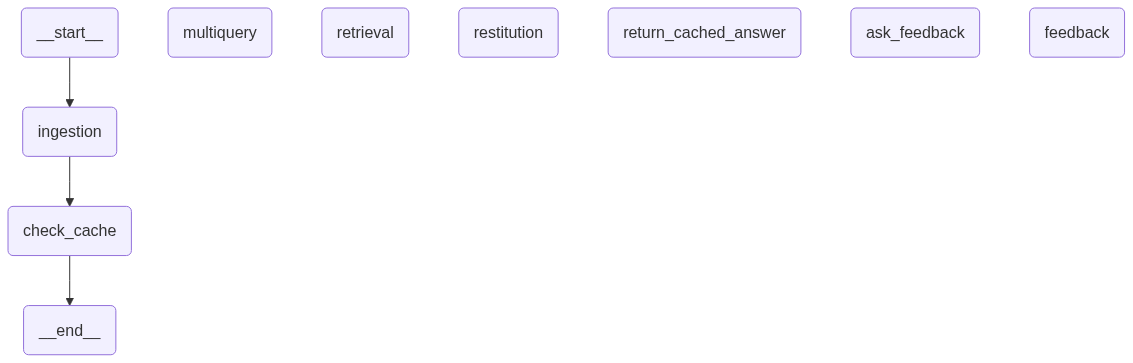

In [ ]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [ ]:
query = "Comment implementer un tool in LangChain in python?"
source = {"type": "web", "path": "https://langchain-ai.github.io/langgraph/tutorials/get-started/2-add-tools/#add-tools"}

result = executor.invoke(RAGState(query=query, sources=[source]))

if(result['cache_hit'] == True) :
  display("🔁 The query was stored in cache 🔁")
else:
  display("💬 Generated Queries:", result['multiple_queries'].queries)
  display("🤔 Query Generation Reasoning:", result['multiple_queries'].reasoning)

print("📝 Final Answer:", result['answer'].answer)

✅ Returning cached answer for query: Comment implementer un tool in LangChain in python?
💬 Réponse : answer="Pour implémenter un outil (tool) dans LangChain en Python, vous devez suivre ces étapes générales :\n\n1. **Définir l'outil** : Créez une classe ou une fonction qui représente l'outil que vous souhaitez ajouter. Cela peut inclure des méthodes pour exécuter des actions spécifiques.\n\n2. **Enregistrer l'outil** : Utilisez les mécanismes fournis par LangChain pour enregistrer votre outil dans le système. Cela peut impliquer d'ajouter votre outil à une liste d'outils disponibles ou de l'intégrer dans un agent ou une chaîne.\n\n3. **Utiliser l'outil** : Une fois l'outil enregistré, vous pouvez l'utiliser dans vos agents ou chaînes pour effectuer des tâches spécifiques en réponse aux demandes des utilisateurs.\n\n4. **Tester l'outil** : Assurez-vous de tester l'outil pour vérifier qu'il fonctionne comme prévu dans le contexte de votre application.\n\nCes étapes peuvent varier légèrem

'🔁 The query was stored in cache 🔁'

📝 Final Answer: Pour implémenter un outil (tool) dans LangChain en Python, vous devez suivre ces étapes générales :

1. **Définir l'outil** : Créez une classe ou une fonction qui représente l'outil que vous souhaitez ajouter. Cela peut inclure des méthodes pour exécuter des actions spécifiques.

2. **Enregistrer l'outil** : Utilisez les mécanismes fournis par LangChain pour enregistrer votre outil dans le système. Cela peut impliquer d'ajouter votre outil à une liste d'outils disponibles ou de l'intégrer dans un agent ou une chaîne.

3. **Utiliser l'outil** : Une fois l'outil enregistré, vous pouvez l'utiliser dans vos agents ou chaînes pour effectuer des tâches spécifiques en réponse aux demandes des utilisateurs.

4. **Tester l'outil** : Assurez-vous de tester l'outil pour vérifier qu'il fonctionne comme prévu dans le contexte de votre application.

Ces étapes peuvent varier légèrement en fonction de la version de LangChain que vous utilisez et des spécificités de votre application.


# RAG level 3 avec FAISS, stored index, configurable

Cette nouvelle version introduit notamment un initializer_agent pour déterminer dynamiquement le chemin à suivre (ingestion ou multiquery) et inclut des modifications dans la gestion des sources, l’indexation FAISS et la restitution.


## 🏗️ Organisation du pipeline
Ce pipeline RAG est désormais structuré autour de cinq agents :

* 🏁 initializer_agent
  * Vérifie l'existence d'un index FAISS local.
  * Oriente le flux vers l'agent d’ingestion ou directement vers l’agent multiquery.
* 📥 ingestion_agent
* 🎯 multiquery_agent
* 🔍 retrieval_agent
  * Crée ou recharge un index FAISS local (avec OllamaEmbeddings).
  * Effectue une recherche par similarité et consolide les résultats (dédoublonnage).
  * Retourne la liste des documents pertinents.
* 📝 restitution_agent

##🔄 Amélioration du Retrieval avec RRF (Reciprocal Rank Fusion)
Le retrieval_agent a été optimisé pour intégrer le Reciprocal Rank Fusion, une méthode sophistiquée de fusion des résultats de recherche.

#### Pourquoi RRF ?
* ✅ Fusion intelligente : Combine les résultats de plusieurs requêtes en une seule liste ordonnée
* ✅ Robustesse : Réduit l'impact des résultats aberrants et favorise les documents pertinents récurrents
* ✅ Pas de normalisation : Fonctionne directement sur les rangs, sans nécessiter de normalisation des scores


#### Fonctionnement du RRF
1. **Collecte des résultats**

```python
# Pour chaque variante de requête générée par multiquery_agent
query_results = []
for query in queries:
    docs = vectorstore.similarity_search(query, k=10)
    query_results.append(docs)
```

2. **Calcul des scores RRF**

```python
RRF_score(document) = Σ 1/(rang + k)
```

 * où :

  * rang est la position du document dans chaque liste de résultats
  * k est une constante (60 par défaut) qui atténue l'impact des rangs élevés

3. **Exemple de scoring Si un document apparaît aux positions :**

  * Rang 1 dans Query 1 : 1/(1 + 60) = 0.0164
  * Rang 3 dans Query 2 : 1/(3 + 60) = 0.0159
  * Rang 5 dans Query 3 : 1/(5 + 60) = 0.0154 Son score RRF final sera : 0.0477

#### Impact sur le pipeline

* Simplification : Fusion de la récupération et du ré-ordonnancement en une seule étape
* Performance : Réduction du nombre d'opérations sur le vectorstore
* Qualité : Meilleure pertinence des résultats grâce à la prise en compte de multiples perspectives de recherche

In [ ]:
from typing import List, Optional, Dict, Literal, Any
from pydantic import BaseModel, Field
from operator import itemgetter

from langchain_community.document_loaders import WebBaseLoader, PyPDFLoader

from langchain_community.vectorstores import Chroma
from langchain_community.vectorstores import FAISS

from langchain_core.runnables.config import RunnableConfig
from langchain_core.runnables import RunnablePassthrough
from langchain_core.retrievers import BaseRetriever
from langchain_core.documents import Document

from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langgraph.graph import StateGraph, END, START
from langchain.load import dumps, loads

In [ ]:
# Structured Output Models
class DocumentMetadata(BaseModel):
    source_url: str
    chunk_id: int


class MultiQueryOutput(BaseModel):
    queries: List[str] = Field(
        description="List of alternative queries generated from the original question",
        min_items=1,
        max_items=5
    )
    reasoning: str = Field(
        description="Explanation of how the alternative queries were relevant to expand the search space for the user query"
    )


class ResponseFormatter(BaseModel):
    answer: str = Field(description="The response to the user's question.")


class ResponseOutput(BaseModel):
    answer: str = Field(description="The response to the user's question.")
    sources: List[DocumentMetadata] = Field(description="The metadata of sources used to generate the answer.")

In [ ]:
# State Management
class RAGState(BaseModel):
    query: str
    sources: Dict[str, Any] = None
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[Document]] = None
    multiple_queries: Optional[MultiQueryOutput] = None
    answer: Optional[ResponseOutput] = None

In [ ]:
# Source Loader Factory
class SourceLoader:
    @staticmethod
    def get_loader(source_type: str, location: str):
        loaders = {
            "web": lambda loc: WebBaseLoader(web_paths=[loc]),
            "pdf": lambda loc: PyPDFLoader(loc),
        }

        loader = loaders.get(source_type.lower())
        if not loader:
            raise ValueError(f"Unsupported source type: {source_type}")

        return loader(location)

In [ ]:
def get_vector_store(config, target_embedding, index_name, state):
    """
    Retrieves or builds a FAISS vector store based on the provided configuration.

    Args:
        config (dict): Configuration dictionary containing the path to the stored index.
        target_embedding: Embedding function or model.
        index_name (str): The name of the index.
        state: An object containing the ingested documents if the index needs to be rebuilt.

    Returns:
        FAISS: The FAISS vector store instance.
    """
    stored_index_base = config["configurable"].get("stored_index")
    stored_index_type = config["configurable"].get("embedding_type")
    stored_index_model = config["configurable"].get("embedding_model")

    # La base vectorielle change avec le modèle de embedding (la dimensionnalité et le typage pourraient changer)
    stored_index_path = f"{stored_index_base}.{stored_index_type}.{stored_index_model}"

    try:
        vectorstore = FAISS.load_local(
            folder_path=stored_index_path,
            embeddings=target_embedding,
            index_name=index_name,
            allow_dangerous_deserialization=True
        )
        print("✅ Data index loaded from cache!")
    except Exception as e:
        print(f"⚠️ Failed to load index from cache.")
        print("🔄 Building the index from documents...")

        vectorstore = FAISS.from_documents(
            documents=state.ingested,
            embedding=target_embedding
        )

        vectorstore.save_local(stored_index_path, index_name=index_name)
        print("💾 Index saved locally!")

    return vectorstore

In [ ]:
def initializer_agent(state: RAGState, config: RunnableConfig) -> Literal["ingestion", "multiquery"]:
    """
    Determines the flow based on whether documents need to be loaded
    and if FAISS index exists
    """
    faiss_index_path = config["configurable"].get("stored_index")
    faiss_index_exists = os.path.exists(faiss_index_path)

    if not faiss_index_exists:
        return "ingestion"
    else:
        return "multiquery"

In [ ]:
def ingestion_agent(state: RAGState, config: RunnableConfig):
    """
    Handles document ingestion from multiple sources with proper document splitting
    and metadata preservation.
    """
    all_docs = []
    total_docs = 0
    global_chunk_id = 0

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=config["configurable"].get("chunk_size", 500),
        chunk_overlap=config["configurable"].get("chunk_overlap", 100)
    )

    for source_type, source_locations in state.sources.items():
        if isinstance(source_locations, str):
            source_locations = [source_locations]

        for location in source_locations:
            try:
                loader = SourceLoader.get_loader(source_type, location)
                docs = loader.load()

                for doc in docs:
                    if not hasattr(doc, 'metadata'):
                        doc.metadata = {}

                    original_metadata = {
                        "source_url": location
                    }

                    splits = text_splitter.split_text(doc.page_content)

                    for split_text in splits:
                        split_doc = Document(
                            page_content=split_text,
                            metadata={
                                **original_metadata,
                                "chunk_id": global_chunk_id
                            }
                        )
                        all_docs.append(split_doc)
                        global_chunk_id += 1
                        total_docs += 1

            except Exception as e:
                continue

    if not all_docs:
        raise ValueError("No documents were successfully loaded")

    return {
        "available_docs": total_docs,
        "ingested": all_docs
    }

In [ ]:
def multiquery_agent(state: RAGState, config: RunnableConfig):
    """
    Generates multiple query variations using structured output.
    """
    template = """You are an AI language model assistant. Your task is to:
    1. Generate between 3-5 different versions of the given user question
    2. Each version should provide a different perspective or approach to the original question
    3. Explain your reasoning for generating these specific variations

    Original question: {question}

    Provide your response in a structured format with:
    - A list of alternative queries
    - Your reasoning for generating these specific variations
    """

    target_llm = get_chat_model(config)

    # Initialize LLM and embeddings
    target_llm = get_chat_model(config)

    prompt = ChatPromptTemplate.from_template(template)
    structured_llm = target_llm.with_structured_output(MultiQueryOutput, method="function_calling")
    chain = prompt | structured_llm

    result = chain.invoke({
        "question": state.query
    })
    return {"multiple_queries": result}

In [ ]:
def retrieval_agent(state: RAGState, config: RunnableConfig):
    """
    Retrieves relevant documents using FAISS with persistence.
    """

    # Create or load FAISS index
    target_embedding = get_embeddings(config)
    index_name = "docs_index"
    vectorstore = get_vector_store(config, target_embedding, index_name, state)

    # Itérer sur toutes les requêtes générées + la query originale
    all_queries = [state.query] + state.multiple_queries.queries

    retrieved_docs = []
    seen_keys = set()

    for query in all_queries:
        docs = vectorstore.max_marginal_relevance_search(
            query=query,
            k=len(all_queries),
            fetch_k=2 * len(all_queries)
        )

        for doc in docs:
            key = (doc.page_content, doc.metadata.get('chunk_id'))
            if key not in seen_keys:
                retrieved_docs.append(doc)
                seen_keys.add(key)

    return {"retrieved_docs": retrieved_docs}

In [ ]:
def restitution_agent(state: RAGState, config: RunnableConfig):
    """
    Generates final response with source attribution.
    """
    if not state.retrieved_docs:
        raise ValueError("No retrieved documents to generate response from")

    # Prepare context from retrieved documents
    context = "\n\n".join(doc.page_content for doc in state.retrieved_docs)

    # Generate the response using the LLM
    target_llm = get_chat_model(config)
    response = target_llm.invoke(
        f"""Based on the following context, answer the question: ```{state.query}```

        Context: ```
{context}
        ```

        Provide a clear and direct answer."""
    )

    # Extract source metadata
    sources = [
        DocumentMetadata(
            source_url=doc.metadata.get("source_url", ""),
            chunk_id=doc.metadata.get("chunk_id", 0)
        )
        for doc in state.retrieved_docs
    ]

    # Format the response
    formatted_response = ResponseOutput(
        answer=response.content,
        sources=sources
    )

    return {"answer": formatted_response}

In [ ]:
# Graph Construction
"""
Constructs and returns the RAG processing graph.
"""
graph = StateGraph(RAGState)

# Add nodes
graph.add_node("ingestion", ingestion_agent)
graph.add_node("multiquery", multiquery_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)

# Connect nodes
graph.add_conditional_edges(
    START,
    initializer_agent
)
# graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "multiquery")
graph.add_edge("multiquery", "retrieval")
graph.add_edge("retrieval", "restitution")
graph.add_edge("restitution", END)

from langgraph.graph.state import CompiledStateGraph
executor = graph.compile()

In [ ]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [ ]:
def process_query(query: str, sources: Dict[str, Any], config: Any):
    """
    Processes a query using the RAG system.
    """
    result = executor.invoke(RAGState(query=query, sources=sources), config=config)

    # Format and return results
    return {
        "answer": result['answer'].answer,
        "sources": set(source.source_url for source in result['answer'].sources),
    }

In [ ]:
sources = {
    "web": [
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/00-introduction.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/01-develoment.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/02-lang-family.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/03-explain-langgraph.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/04-explain-langchain.md",
    ]
}
query = "C'est quoi et comment fonctionne un VectorStore en LangChain?"
config = {
    "configurable": {
        "max_contexts": 3,
        "model_type": "ollama",
        "model": "llama3.2",
        "temperature": 0.3,
        "embedding_type": "ollama",
        "embedding_model": "nomic-embed-text",
        "stored_index": "./faiss_index_rag3",
        "chunk_size": 500,
        "chunk_overlap": 100
    }
}

result = process_query(query, sources, config)
print("💬 Answer:", result['answer'])
print("\n\n📚 Sources Used:")
for source in result['sources']:
    print(f"- {source}")

# RAG level 4 avec Reciprocal Rank Fusion


## 🔄 Amélioration du Retrieval avec RRF (Reciprocal Rank Fusion)
Le retrieval_agent a été optimisé pour intégrer le Reciprocal Rank Fusion, une méthode sophistiquée de fusion des résultats de recherche.

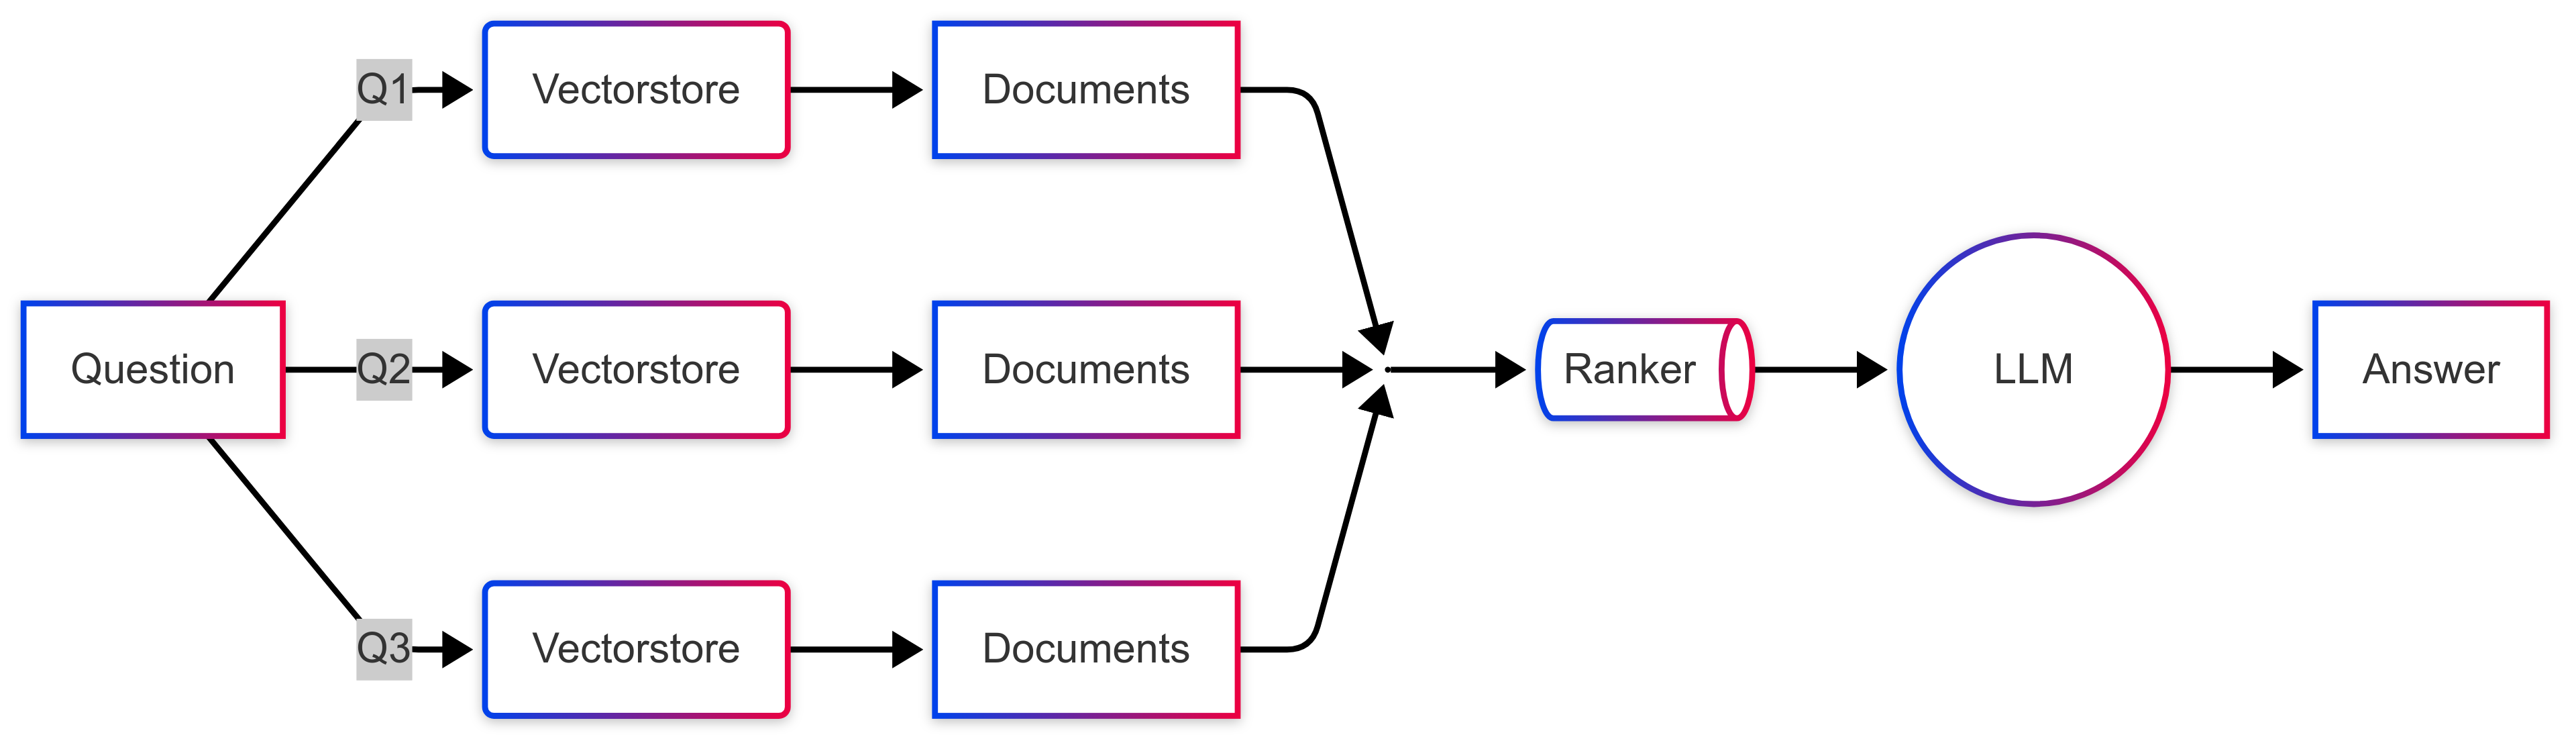


Pourquoi RRF ?
* ✅ Fusion intelligente : Combine les résultats de plusieurs requêtes en une seule liste ordonnée
* ✅ Robustesse : Réduit l'impact des résultats aberrants et favorise les documents pertinents récurrents
* ✅ Pas de normalisation : Fonctionne directement sur les rangs, sans nécessiter de normalisation des scores

## Fonctionnement du RRF

1. Collecte des résultats

```
# Pour chaque variante de requête générée par multiquery_agent
query_results = []
for query in queries:
    docs = vectorstore.similarity_search(query, k=10)
    query_results.append(docs)
```

2. Calcul des scores RRF

RRF_score(document) = Σ 1/(rang + k)
où:

* rang est la position du document dans chaque liste de résultats
* k est une constante (60 par défaut) qui atténue l'impact des rangs élevés

3. Exemple de scoring Si un document apparaît aux positions :

* Rang 1 dans Query 1 : 1/(1 + 60) = 0.0164
* Rang 3 dans Query 2 : 1/(3 + 60) = 0.0159
* Rang 5 dans Query 3 : 1/(5 + 60) = 0.0154 Son score RRF final sera : 0.0477

## Impact sur le pipeline
* Simplification : Fusion de la récupération et du ré-ordonnancement en une seule étape
* Performance : Réduction du nombre d'opérations sur le vectorstore
* Qualité : Meilleure pertinence des résultats grâce à la prise en compte de multiples perspectives de recherche

In [ ]:
def retrieval_agent(state: RAGState, config: RunnableConfig):
    """
    Retrieves and ranks relevant documents using FAISS with RRF ranking.
    """
    # Create or load FAISS index
    target_embedding = get_embeddings(config)
    index_name = "docs_index"
    vectorstore = get_vector_store(config, target_embedding, index_name, state)

    # Step 1: Get initial results for each query variation
    # For each query, we get a ranked list of documents with similarity scores
    query_results = []
    print("\nStep 1: Initial retrieval for each query variant:")
    for i, query in enumerate(state.multiple_queries.queries):
        docs = vectorstore.similarity_search(query, k=config["configurable"].get("max_contexts", 5))
        query_results.append(docs)
        print(f"Query {i + 1}: '{query[:50]}...' retrieved {len(docs)} documents")

    # Step 2: Apply Reciprocal Rank Fusion
    # RRF score = sum across all rankings of 1/(rank + k)
    # where k is a constant that mitigates the impact of high rankings
    k = config["configurable"].get("rrf_k", 60)
    fused_scores = {}

    print("\nStep 2: RRF Scoring Details:")
    for query_index, docs in enumerate(query_results):
        print(f"\nProcessing results from Query {query_index + 1}:")

        for rank, doc in enumerate(docs):
            doc_str = dumps(doc)
            if doc_str not in fused_scores:
                fused_scores[doc_str] = 0

            # Calculate RRF score contribution for this document in this ranking
            rrf_contribution = 1 / (rank + k)
            fused_scores[doc_str] += rrf_contribution

            print(f"Document (chuck_id): '{doc.metadata.get('chunk_id')}'")
            print(f"  Rank in this query: {rank + 1}")
            print(f"  RRF score contribution: {rrf_contribution:.4f}")
            print(f"  Current total RRF score: {fused_scores[doc_str]:.4f}")

    # Step 3: Sort documents by their final RRF scores
    print("\nStep 3: Final Rankings:")
    sorted_docs = sorted(
        fused_scores.items(),
        key=itemgetter(1),
        reverse=True
    )

    # Print top 5 results with scores
    print("\nTop max_contexts (or 5) Documents after RRF:")
    for i, (doc_str, score) in enumerate(sorted_docs[:config["configurable"].get("max_contexts", 5)]):
        doc = loads(doc_str)
        print(f"{i + 1}. Score: {score:.4f} - '{doc.metadata.get('chunk_id')}...'")

    # Step 4: Create final retrieved_docs list with deduplication
    retrieved_docs = []
    seen_keys = set()

    for doc_str, _ in sorted_docs:
        doc = loads(doc_str)
        key = (doc.page_content, doc.metadata.get('chunk_id'))
        if key not in seen_keys:
            retrieved_docs.append(doc)
            seen_keys.add(key)

    print(f"\nFinal unique documents after deduplication: {len(retrieved_docs)}")
    return {"retrieved_docs": retrieved_docs}

In [ ]:
# Graph Construction
"""
Constructs and returns the RAG processing graph.
"""
graph = StateGraph(RAGState)

# Add nodes
graph.add_node("ingestion", ingestion_agent)
graph.add_node("multiquery", multiquery_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("restitution", restitution_agent)

# Connect nodes
graph.add_conditional_edges(
    START,
    initializer_agent
)
# graph.set_entry_point("ingestion")
graph.add_edge("ingestion", "multiquery")
graph.add_edge("multiquery", "retrieval")
graph.add_edge("retrieval", "restitution")
graph.add_edge("restitution", END)

from langgraph.graph.state import CompiledStateGraph
executor = graph.compile()

In [ ]:
def process_query(query: str, sources: Dict[str, Any], config: Any):
    """
    Processes a query using the RAG system.
    """
    result = executor.invoke(RAGState(query=query, sources=sources), config=config)

    # Format and return results
    return {
        "answer": result['answer'].answer,
        "sources": set(source.source_url for source in result['answer'].sources),
    }

In [ ]:
sources = {
    "web": [
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/00-introduction.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/01-develoment.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/02-lang-family.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/03-explain-langgraph.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/04-explain-langchain.md",
    ]
}
query = "C'est quoi et comment fonctionne un VectorStore en LangChain?"
config = {
    "configurable": {
        "max_contexts": 3,
        "model_type": "ollama",
        "model": "llama3.2",
        "temperature": 0.3,
        "embedding_type": "ollama",
        "embedding_model": "nomic-embed-text",
        "stored_index": "./faiss_index_rag3",
        "chunk_size": 500,
        "chunk_overlap": 100,
        "rrf_k": 60
    }
}

result = process_query(query, sources, config)
print("💬 Answer:", result['answer'])
print("\n\n📚 Sources Used:")
for source in result['sources']:
    print(f"- {source}")

# RAG level 5 avec Query Response Decomposition

L'architecture a été enrichie avec Query Response Decomposition (QRD), qui améliore la granularité et la pertinence des réponses dans le pipeline RAG.

## 🏗 Introduction à QRD
La décomposition des requêtes permet de diviser une question complexe en sous-questions successives afin de mieux contextualiser et structurer la réponse. Ce procédé améliore l’alignement entre la requête et les résultats du VectorStore, rendant la récupération d’informations plus précise.

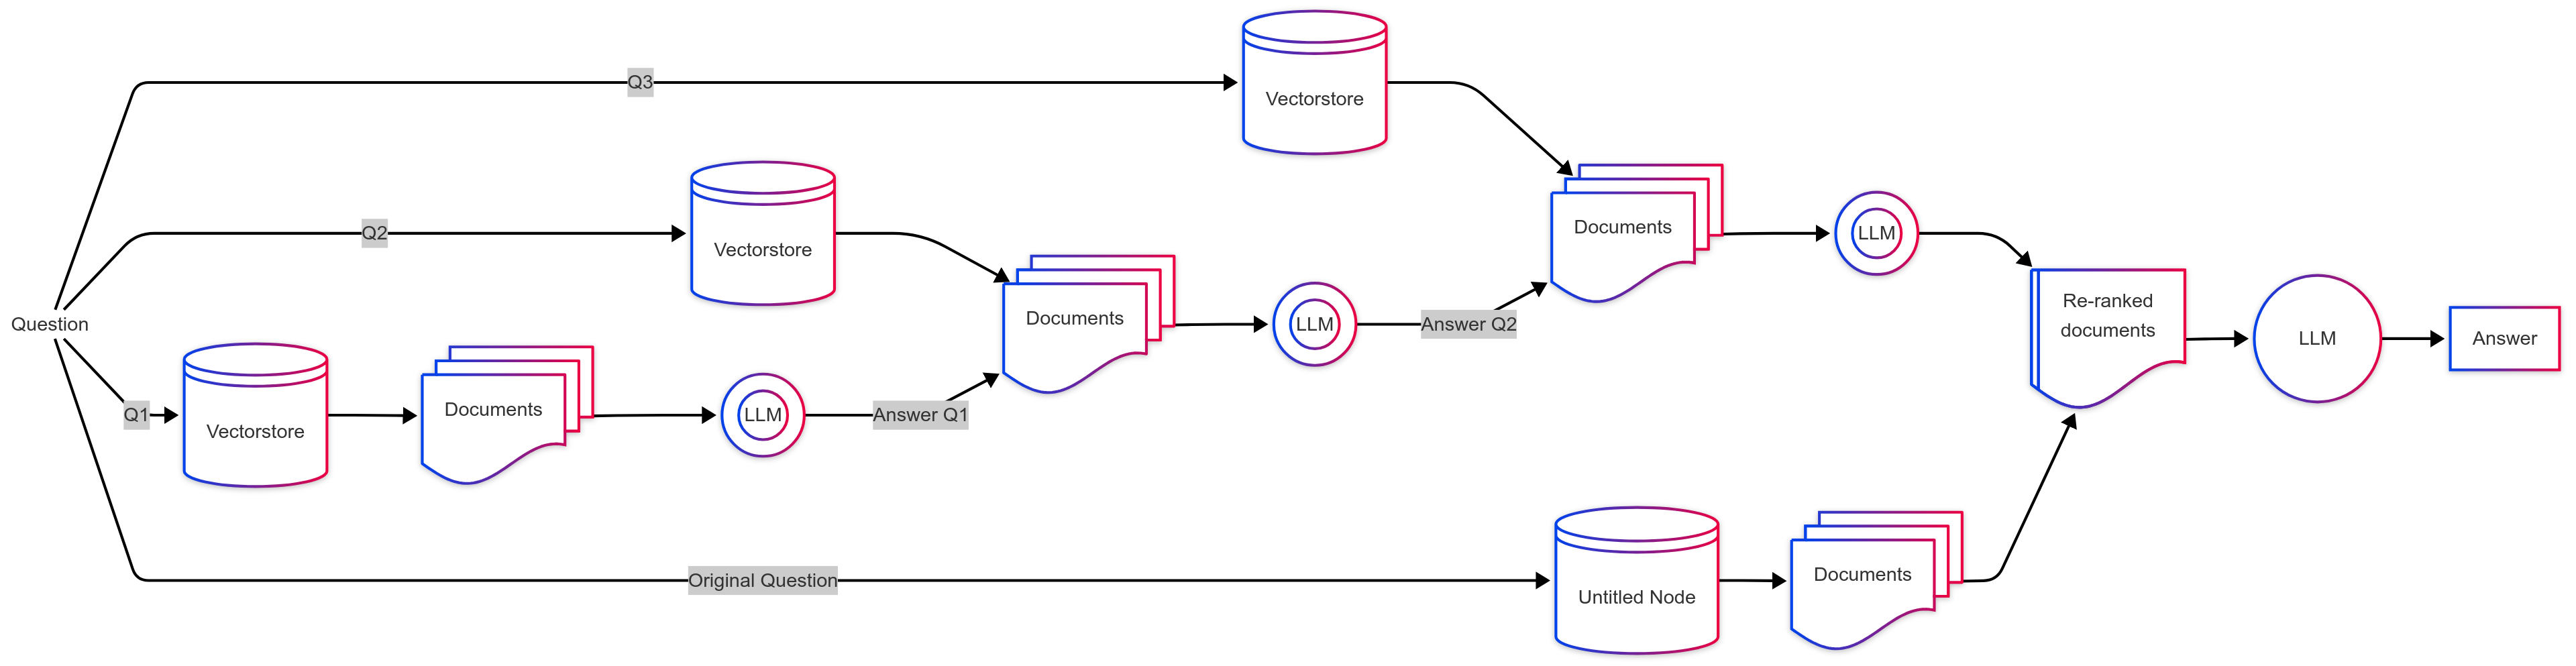

####📌 Graph de pipeline :

[Ingestion] → [MultiQuery] → [Decomposition] → [Recursive Response] → [Retrieval] → [RRF Ranking] → [Restitution]

####💡 Principales améliorations :

* Décomposition des questions en sous-questions progressives
* Réponses récursives intégrant les sous-questions pour enrichir la recherche
* Amélioration du retrieval avec des requêtes multi-niveaux basées sur les réponses intermédiaires

## 🔍 1. Décomposition des requêtes (Query Response Decomposition)
> Objectif : Transformer une question en une séquence logique de sous-questions autonomes pour améliorer le focus de chaque recherche.

###📌 Exemple de décomposition :

🔹 Question originale :
🧐 "Comment fonctionne LangChain pour la récupération d'informations dans une architecture RAG ?"

🔹 Sous-questions générées :
1️⃣ "Qu'est-ce que LangChain et quel est son rôle dans l'IA générative ?"
2️⃣ "Quels sont les principaux composants de LangChain utilisés pour la récupération d’informations ?"
3️⃣ "Comment LangChain interagit-il avec un VectorStore pour récupérer et traiter les documents ?"

## 🏗 2. Réponses récursives avec maintien du contexte
Une fois les sous-questions générées, le Recursive Response Agent les traite séquentiellement en maintenant l’historique conversationnel :

🔄 Processus :
1️⃣ Extraction du contexte pour chaque sous-question
2️⃣ Génération de réponses intermédiaires
3️⃣ Synthèse finale en une réponse complète

## 📖 3. Amélioration du Retrieval avec QRD & RRF
Le retrieval_agent est désormais capable d'exploiter les sous-réponses pour affiner la recherche d’informations :

💡 Méthodologie :

* 🟢 Recherche basée sur la requête principale
* 🟢 Recherche optimisée avec les sous-réponses comme contexte supplémentaire
* 🟢 Fusion RRF des résultats pour ordonner les documents les plus pertinents

```python
# Recherche améliorée avec réponses intermédiaires
for sub_answer in recursive_result.sub_answers:
    enhanced_query = f"{sub_answer.question} {sub_answer.answer}"
    sub_docs = vectorstore.similarity_search(
        enhanced_query,
        k=config["configurable"].get("max_contexts", 3)
    )
    all_docs.extend(sub_docs)
```

##🏆 4. Restitution Finale : Synthèse multi-niveau
Une fois les documents classés et fusionnés avec RRF, l’assistant restitue la réponse finale en préservant la structure conversationnelle :

#### 📌 Format conversationnel structuré :

```plaintext
🧑‍💻 Human: "Comment fonctionne LangChain pour la récupération d'informations ?"
🤖 AI: "LangChain est une bibliothèque permettant d'enchaîner plusieurs étapes..."
🧑‍💻 Human: "Quels sont les principaux composants de LangChain pour la récupération ?"
🤖 AI: "Les principaux composants sont les outils de gestion de la mémoire..."
...
🧑‍💻 Human: "Synthétisez la réponse finale"
🤖 AI: "LangChain permet de récupérer des documents en exploitant..."
```

## 🔥 Pourquoi cette approche ?
✅ Granularité améliorée : La segmentation des requêtes évite les réponses trop larges

✅ Recherche plus précise : Chaque réponse intermédiaire optimise le retrieval suivant

✅ Pipeline robuste & scalable : La modularité permet d’améliorer chaque étape indépendamment

In [ ]:
import os
from operator import itemgetter
from typing import List, Optional, Dict, Literal, Any

from pydantic import BaseModel, Field
import bs4

# Set environment variable
os.environ["USER_AGENT"] = "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:123.0) Gecko/20100101 Firefox/123.0"

# LangChain Imports
from langchain_community.document_loaders import WebBaseLoader, PyPDFLoader
from langchain_community.vectorstores import Chroma, FAISS

from langchain_core.documents import Document
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.retrievers import BaseRetriever
from langchain_core.runnables import RunnablePassthrough
from langchain_core.runnables.config import RunnableConfig

from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.prompts import ChatPromptTemplate
from langchain.load import dumps, loads

from langchain_ollama import ChatOllama, OllamaEmbeddings
from langchain_openai import ChatOpenAI, OpenAIEmbeddings

# LangGraph Imports
from langgraph.graph import StateGraph, END, START

In [ ]:
class SubQuestionAnswer(BaseModel):
    question: str = Field(description="The sub-question")
    answer: str = Field(description="Answer to the sub-question")


class RecursiveAnswer(BaseModel):
    final_answer: str = Field(description="The synthesized answer incorporating all sub-question responses")


class RecursiveOutput(BaseModel):
    final_answer: str = Field(description="The synthesized answer incorporating all sub-question responses")
    sub_answers: List[SubQuestionAnswer] = Field(
        description="List of answers to each sub-question in sequential order"
    )


class DecompositionOutput(BaseModel):
    sub_questions: List[str] = Field(
        description="List of sub-questions generated from the original question",
        min_items=1,
        max_items=3
    )


class ResponseOutput(BaseModel):
    answer: str = Field(description="The final comprehensive answer")

In [ ]:
class MultiQueryOutput(BaseModel):
    queries: List[str] = Field(
        description="List of alternative queries generated from the original question",
        min_items=1,
        max_items=5
    )
    reasoning: str = Field(
        description="Explanation of how the alternative queries were relevant to expand the search space for the user query"
    )

In [ ]:
class RAGState(BaseModel):
    query: str
    sources: Dict[str, Any] = None
    available_docs: int = 0
    ingested: Optional[List[Document]] = None
    retrieved_docs: Optional[List[Document]] = None
    ranked_docs: Optional[List[Document]] = None  # New field for ranked documents
    multiple_queries: Optional[MultiQueryOutput] = None
    decomposed_results: Optional[Dict[str, DecompositionOutput]] = None
    recursive_answers: Optional[Dict[str, RecursiveOutput]] = None
    answer: Optional[ResponseOutput] = None

In [ ]:
def initializer_agent(state: RAGState, config: RunnableConfig) -> Literal["ingestion", "multiquery"]:
    """
    Determines the flow based on whether documents need to be loaded
    and if FAISS index exists
    """
    faiss_index_path = config["configurable"].get("stored_index")
    faiss_index_exists = os.path.exists(faiss_index_path)

    if not faiss_index_exists:
        return "ingestion"
    else:
        return "multiquery"

In [ ]:
def multiquery_agent(state: RAGState, config: RunnableConfig):
    """
    Generates multiple query variations using structured output.
    """
    template = """You are an AI language model assistant. Your task is to:
    1. Generate between 3-5 different versions of the given user question
    2. Each version should provide a different perspective or approach to the original question
    3. Explain your reasoning for generating these specific variations

    Original question: {question}

    Provide your response in a structured format with:
    - A list of alternative queries
    - Your reasoning for generating these specific variations
    """

    target_llm = get_chat_model(config)

    # Initialize LLM and embeddings
    target_llm = get_chat_model(config)

    prompt = ChatPromptTemplate.from_template(template)
    structured_llm = target_llm.with_structured_output(MultiQueryOutput, method="function_calling")
    chain = prompt | structured_llm

    result = chain.invoke({
        "question": state.query
    })
    return {"multiple_queries": result}

In [ ]:
def get_chat_model(config):
    model_type = config["configurable"].get("model_type", "ollama")
    model_name = config["configurable"].get("model", "llama3.2")
    model_temperature = config["configurable"].get("temperature", 0.03)
    model_max_retries = config["configurable"].get("max_retry", 3)

    print(f"Selected Configuration:\n"
          f"Model Type: {model_type}\n"
          f"Model Name: {model_name}\n"
          f"Temperature: {model_temperature}\n"
          f"Max Retries: {model_max_retries}")

    if model_type.lower() == "ollama":
        # Return ChatOllama if the model type is "ollama"
        return ChatOllama(
            model=model_name,
            temperature=model_temperature,
            max_retries=model_max_retries
        )
    elif model_type.lower() == "openai":
        # Return ChatOpenAI if the model type is "openai"
        return ChatOpenAI(
            model=model_name,
            temperature=model_temperature,
            max_retries=model_max_retries
        )
    else:
        raise ValueError(f"Unrecognized model type: {model_type}")

In [ ]:
def get_embeddings(config):
    model_type = config["configurable"].get("embedding_type", "ollama")
    model_name = config["configurable"].get("embedding_model", "nomic-embed_text")

    print(f"Selected Embedding Configuration:\n"
          f"Embedding Type: {model_type}\n"
          f"Embedding Model: {model_name}")

    if model_type.lower() == "ollama":
        return OllamaEmbeddings(
            model=model_name
        )
    elif model_type.lower() == "openai":
        return OpenAIEmbeddings(
            model=model_name
        )
    else:
        raise ValueError(f"Unrecognized model type: {model_type}")

In [ ]:
def get_vector_store(config, target_embedding, index_name, state):
    """
    Retrieves or builds a FAISS vector store based on the provided configuration.

    Args:
        config (dict): Configuration dictionary containing the path to the stored index.
        target_embedding: Embedding function or model.
        index_name (str): The name of the index.
        state: An object containing the ingested documents if the index needs to be rebuilt.

    Returns:
        FAISS: The FAISS vector store instance.
    """
    stored_index_base = config["configurable"].get("stored_index")
    stored_index_type = config["configurable"].get("embedding_type")
    stored_index_model = config["configurable"].get("embedding_model")

    # La base vectorielle change avec le modèle de embedding (la dimensionnalité et le typage pourraient changer)
    stored_index_path = f"{stored_index_base}.{stored_index_type}.{stored_index_model}"

    try:
        vectorstore = FAISS.load_local(
            folder_path=stored_index_path,
            embeddings=target_embedding,
            index_name=index_name,
            allow_dangerous_deserialization=True
        )
        print("✅ Data index loaded from cache!")
    except Exception as e:
        print(f"⚠️ Failed to load index from cache.")
        print("🔄 Building the index from documents...")

        vectorstore = FAISS.from_documents(
            documents=state.ingested,
            embedding=target_embedding
        )

        vectorstore.save_local(stored_index_path, index_name=index_name)
        print("💾 Index saved locally!")

    return vectorstore

In [ ]:
# Source Loader Factory
class SourceLoader:
    @staticmethod
    def get_loader(source_type: str, location: str):
        loaders = {
            "web": lambda loc: WebBaseLoader(web_paths=[loc]),
            "pdf": lambda loc: PyPDFLoader(loc),
        }

        loader = loaders.get(source_type.lower())
        if not loader:
            raise ValueError(f"Unsupported source type: {source_type}")

        return loader(location)

In [ ]:
def ingestion_agent(state: RAGState, config: RunnableConfig):
    """
    Handles document ingestion from multiple sources with proper document splitting
    and metadata preservation.
    """
    all_docs = []
    total_docs = 0
    global_chunk_id = 0

    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=config["configurable"].get("chunk_size", 500),
        chunk_overlap=config["configurable"].get("chunk_overlap", 100)
    )

    for source_type, source_locations in state.sources.items():
        if isinstance(source_locations, str):
            source_locations = [source_locations]

        for location in source_locations:
            try:
                loader = SourceLoader.get_loader(source_type, location)
                docs = loader.load()

                for doc in docs:
                    if not hasattr(doc, 'metadata'):
                        doc.metadata = {}

                    original_metadata = {
                        "source_url": location
                    }

                    splits = text_splitter.split_text(doc.page_content)

                    for split_text in splits:
                        split_doc = Document(
                            page_content=split_text,
                            metadata={
                                **original_metadata,
                                "chunk_id": global_chunk_id
                            }
                        )
                        all_docs.append(split_doc)
                        global_chunk_id += 1
                        total_docs += 1

            except Exception as e:
                continue

    if not all_docs:
        raise ValueError("No documents were successfully loaded")

    return {
        "available_docs": total_docs,
        "ingested": all_docs
    }

In [ ]:
def decomposition_agent(state: RAGState, config: RunnableConfig):
    """
    Decomposes each query from multiquery into sub-questions.
    """
    template = """You are an AI language model assistant. Your task is to:
    1. Break down the given question into sequential sub-questions
    2. Each sub-question should build upon the previous ones
    3. Design questions that progressively build understanding once answered in order
    4. **LIMIT TO 3 QUESTIONS**

    DO NOT create or use any other function types, even if the question is about function definition or any structure of any type,
    like databases, or any other technical topic. All answer must use the DecompositionOutput function.

    Original question: {question}

    Each sub-question should be self-contained and specific.
    """

    target_llm = get_chat_model(config)

    decomposed_results = {}

    for query in state.multiple_queries.queries:
        prompt = ChatPromptTemplate.from_template(template)
        structured_llm = target_llm.with_structured_output(DecompositionOutput, method="function_calling")
        chain = prompt | structured_llm

        decomposition = chain.invoke({
            "question": query
        })
        decomposed_results[query] = decomposition

    return {"decomposed_results": decomposed_results}

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

def recursive_response_agent(state: RAGState, config: RunnableConfig):
    """
    Processus récursif pour traiter des sous-questions en construisant un historique de conversation sans doublons.
    """
    target_llm = get_chat_model(config)
    target_embedding = get_embeddings(config)
    index_name = "docs_index"
    vectorstore = get_vector_store(config, target_embedding, index_name, state)

    recursive_answers = {}

    for query, decomposition in state.decomposed_results.items():
        # Messages de base, partagés pour chaque requête
        base_messages = [
            SystemMessage(
                content="""
You are a helpful assistant that provides clear, accurate answers based on the provided context.
Build upon previous question-answer pairs to provide comprehensive responses.

DO NOT create or use any other function types, even if the question is about function definition or any structure of any type,
like databases, or any other technical topic. All responses must use the SubQuestionAnswer function.
                """
            )
        ]
        # Historique de conversation (Q/R) à ajouter une seule fois par itération
        conversation_history = []
        sub_answers = []

        # Traitement des sous-questions séquentiellement
        for sub_q in decomposition.sub_questions:
            # Récupération des documents pertinents
            docs = vectorstore.similarity_search(
                sub_q,
                k=config["configurable"].get("max_contexts", 5)
            )

            # Construction du message pour la sous-question courante
            messages = base_messages.copy()
            messages.append(SystemMessage(
                content=f"Context for the next question: {' '.join(doc.page_content for doc in docs)}"
            ))
            # Ajout de l'historique de conversation (chaque Q/R apparaît une seule fois)
            messages.extend(conversation_history)
            # Ajout de la question courante
            messages.append(HumanMessage(content=sub_q))

            # Appel du modèle avec le format structuré pour obtenir la réponse
            chain = target_llm.with_structured_output(SubQuestionAnswer, method="function_calling")
            response = chain.invoke(messages)

            # Mise à jour de l'historique de conversation avec la Q/R courante
            conversation_history.append(HumanMessage(content=sub_q))
            conversation_history.append(AIMessage(content=response.answer))
            sub_answers.append(response)

        # Construction du message final pour synthétiser la réponse complète à la requête initiale
        final_messages = base_messages.copy()
        final_messages.extend(conversation_history)
        final_messages.append(HumanMessage(
            content=f"Now provide a final comprehensive answer to the original query: {query}"
        ))
        final_response = target_llm.with_structured_output(RecursiveAnswer).invoke(final_messages)
        final_response = RecursiveOutput(final_answer=final_response.final_answer, sub_answers=sub_answers)
        recursive_answers[query] = final_response

    return {"recursive_answers": recursive_answers}

In [ ]:
def retrieval_agent(state: RAGState, config: RunnableConfig):
    """
    Retrieves documents using FAISS, incorporating both multiquery and recursive answer results.
    """
    target_embedding = get_embeddings(config)
    index_name = "docs_index"
    vectorstore = get_vector_store(config, target_embedding, index_name, state)

    all_docs = []

    # Get results for original queries
    for query in state.multiple_queries.queries:
        # Get documents for original query
        docs = vectorstore.similarity_search(
            query,
            k=config["configurable"].get("max_contexts", 5)
        )
        all_docs.extend(docs)

        # Get documents based on recursive answers
        if query in state.recursive_answers:
            recursive_result = state.recursive_answers[query]

            # Use sub-answers to enhance retrieval
            for sub_answer in recursive_result.sub_answers:
                enhanced_query = f"{sub_answer.question} {sub_answer.answer}"
                sub_docs = vectorstore.similarity_search(
                    enhanced_query,
                    k=config["configurable"].get("max_contexts", 3)
                )
                all_docs.extend(sub_docs)

            # Use final answer for additional context
            final_docs = vectorstore.similarity_search(
                recursive_result.final_answer,
                k=config["configurable"].get("max_contexts", 3)
            )
            all_docs.extend(final_docs)

    return {"retrieved_docs": all_docs}

In [ ]:
from collections import defaultdict

def rrf_ranking_agent(state: RAGState, config: RunnableConfig):
    """
    Applies Reciprocal Rank Fusion to rank and deduplicate retrieved documents.
    """
    if not state.retrieved_docs:
        return {"ranked_docs": []}

    # Reciprocal Rank Fusion
    scored_docs = defaultdict(list)

    for i, doc in enumerate(state.retrieved_docs):
        doc_id = doc.metadata.get('chunk_id', str(i))
        rank = i + 1
        scored_docs[doc_id].append(1 / (config["configurable"].get("k_rrf", 60) + rank))

    # Aggregate RRF scores
    final_scores = {
        doc_id: sum(scores) for doc_id, scores in scored_docs.items()
    }

    # Sort documents by final RRF score
    ranked_docs = sorted(
        [(doc_id, score) for doc_id, score in final_scores.items()],
        key=lambda x: x[1],
        reverse=True
    )

    # Get unique documents in ranked order
    seen_ids = set()
    unique_ranked_docs = []

    for doc in state.retrieved_docs:
        doc_id = doc.metadata.get('chunk_id', '')
        if doc_id in [d[0] for d in ranked_docs] and doc_id not in seen_ids:
            unique_ranked_docs.append(doc)
            seen_ids.add(doc_id)

    # Take top K documents
    top_k = config["configurable"].get("max_contexts", 5)
    ranked_docs = unique_ranked_docs[:top_k]

    return {"ranked_docs": ranked_docs}

In [ ]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

def restitution_agent(state: RAGState, config: RunnableConfig):
    """
    Generates the final answer using ranked documents and recursive answers while preserving the conversational structure.
    """
    target_llm = get_chat_model(config)

    messages = [
        SystemMessage(content="""You are a helpful assistant that provides comprehensive answers.
        Use the context from ranked documents and previous recursive answers to provide a detailed response.
        Make sure to synthesize information from all sources coherently while maintaining a structured conversational flow.""")
    ]

    # Add ranked documents as context
    if state.ranked_docs:
        context = "\n".join(doc.page_content for doc in state.ranked_docs)
        messages.append(SystemMessage(content=f"Context from ranked documents:\n{context}"))

    # Add recursive answers as a conversation flow
    if state.recursive_answers:
        for query, result in state.recursive_answers.items():
            messages.append(HumanMessage(content=query))  # Original query
            messages.append(AIMessage(content=result.final_answer))  # Final synthesized answer

            # Include sub-questions and their answers in a conversational manner
            for qa in result.sub_answers:
                messages.append(HumanMessage(content=qa.question))
                messages.append(AIMessage(content=qa.answer))

    # Add the original query again for final synthesis
    messages.append(HumanMessage(content=state.query))

    # Generate the final structured response
    chain = target_llm.with_structured_output(ResponseOutput, method="function_calling")
    response = chain.invoke(messages)

    return {"answer": response}

In [ ]:
# Graph Construction
graph = StateGraph(RAGState)

# Add nodes
graph.add_node("ingestion", ingestion_agent)
graph.add_node("multiquery", multiquery_agent)
graph.add_node("decomposition", decomposition_agent)
graph.add_node("recursive_response", recursive_response_agent)
graph.add_node("retrieval", retrieval_agent)
graph.add_node("rrf_ranking", rrf_ranking_agent)  # New node
graph.add_node("restitution", restitution_agent)

# Connect nodes
graph.add_conditional_edges(
    START,
    initializer_agent
)
graph.add_edge("ingestion", "multiquery")
graph.add_edge("multiquery", "decomposition")
graph.add_edge("decomposition", "recursive_response")
graph.add_edge("recursive_response", "retrieval")
graph.add_edge("retrieval", "rrf_ranking")
graph.add_edge("rrf_ranking", "restitution")
graph.add_edge("restitution", END)

executor = graph.compile()

In [ ]:
from IPython.display import Image, display
display(Image(executor.get_graph().draw_mermaid_png()))

In [ ]:
def process_query(query: str, sources: Dict[str, Any], config: Any):
    """
    Processes a query using the RAG system.
    """
    result = executor.invoke(RAGState(query=query, sources=sources), config=config)

    # Format and return results
    return result['answer']

In [ ]:
sources = {
    "web": [
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/00-introduction.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/01-develoment.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/02-lang-family.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/03-explain-langgraph.md",
        "https://raw.githubusercontent.com/P2Enjoy/academy-tutorial-python/refs/heads/main/rag/rag/04-explain-langchain.md",
    ]
}
query = "C'est quoi et comment fonctionne un VectorStore en LangChain?"
config = {
    "configurable": {
        "max_contexts": 3,
        "max_retry": 5,
        # "model_type": "openai",
        # "model": "gpt-4o",
        "model_type": "ollama",
        "model": "llama3.2",
        "temperature": 0,
        "embedding_type": "ollama",
        "embedding_model": "nomic-embed-text",
        "stored_index": "./faiss_index_rag5",
        "chunk_size": 500,
        "chunk_overlap": 100,
        "rrf_k": 60
    }
}
result = process_query(query, sources, config)
print("💬 Answer:", result.answer)